In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
snodjup = pd.read_pickle("../Dataframes/df_snow_save.pkl")

- Snödjupet är taget från Säve mellan 1944 och 2003

In [3]:
snodjup['Datum'] = pd.to_datetime(snodjup['Datum'])
snodjup['Year'] = snodjup['Datum'].dt.year
snodjup['Month'] = snodjup['Datum'].dt.month
snodjup

,Datum,Tid_UTC,Snödjup,Kvalitet,Markens_tillstånd,Kvalitet_1,Month,Year,Snittdjup_per_dag_för_månaden
0,1944-01-01,07:00:00,0.0,G,0,G,1,1944,0.01
1,1944-01-02,07:00:00,0.0,G,0,G,1,1944,0.01
2,1944-01-03,07:00:00,0.0,G,0,G,1,1944,0.01
3,1944-01-04,07:00:00,0.0,G,0,G,1,1944,0.01
4,1944-01-05,07:00:00,0.0,G,0,G,1,1944,0.01
...,...,...,...,...,...,...,...,...,...
15181,2002-11-24,06:00:00,0.0,G,2,G,11,2002,0.00
15182,2002-11-25,06:00:00,0.0,G,2,G,11,2002,0.00
15183,2002-11-26,06:00:00,0.0,G,2,G,11,2002,0.00
15184,2002-11-30,06:00:00,0.0,G,11,G,11,2002,0.00


<Axes: xlabel='Datum', ylabel='Year'>

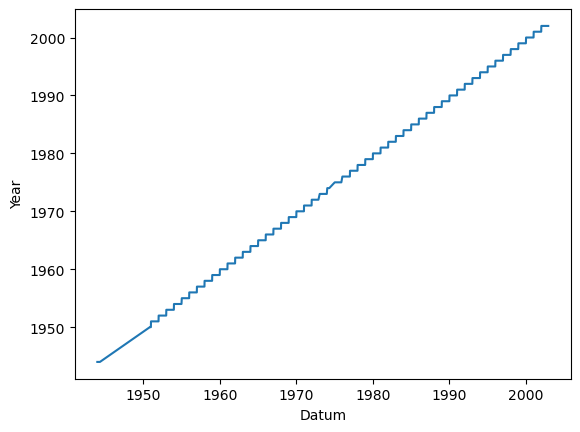

In [4]:
sns.lineplot(data=snodjup, x='Datum', y='Year')

In [5]:
snodjup.Year.value_counts()

Year
1960    366
1959    365
1953    364
1980    364
1952    364
1951    364
1989    363
1954    363
1961    363
1991    362
1965    362
1968    362
1957    361
1981    361
1990    360
1987    360
1958    359
1956    358
1992    358
1993    358
1995    357
2001    357
1994    356
1963    356
1999    355
1979    354
1985    354
1988    353
1955    352
1964    348
1966    347
2000    346
1984    336
1986    334
1982    327
1967    315
1996    315
1997    311
1983    307
1998    299
2002    262
1978    123
1970    121
1969    119
1962    105
1944     93
1977     92
1950     61
1976     61
1972     58
1973     40
1971     24
1974      9
1975      2
Name: count, dtype: int64

In [6]:
snodjup2 = snodjup.query("Snödjup >= .01")
snodjup2

,Datum,Tid_UTC,Snödjup,Kvalitet,Markens_tillstånd,Kvalitet_1,Month,Year,Snittdjup_per_dag_för_månaden
8,1944-01-09,07:00:00,0.04,G,17,G,1,1944,0.01
9,1944-01-10,07:00:00,0.05,G,17,G,1,1944,0.01
10,1944-01-11,07:00:00,0.05,G,17,G,1,1944,0.01
11,1944-01-12,07:00:00,0.05,G,17,G,1,1944,0.01
12,1944-01-13,07:00:00,0.05,G,17,G,1,1944,0.01
...,...,...,...,...,...,...,...,...,...
14980,2002-02-26,06:00:00,0.03,G,17,G,2,2002,0.00
14981,2002-02-27,06:00:00,0.02,G,13,G,2,2002,0.00
15159,2002-10-19,06:00:00,0.21,G,13,G,10,2002,0.02
15160,2002-10-20,06:00:00,0.20,G,13,G,10,2002,0.02


In [7]:
snodjup3 = snodjup

In [8]:
# def period(row):
#   if row['Month'] < 7:
#     return f"Sommar {row['Year'] - 1} - Vinter {row['Year']}"
#   else:
#     return f"Vinter {row['Year']} - Sommar {row['Year'] + 1}"

# snodjup3['Årsperiod'] = snodjup3.apply(period, axis=1)

# df_period = snodjup3.groupby('Årsperiod')['Snödjup'].sum().reset_index()

In [9]:
def period(row):
  if row['Month'] < 7:
    return f"Sommar {row['Year'] - 1} - Vinter {row['Year']}"
  else:
    pass

snodjup3['Årsperiod'] = snodjup3.apply(period, axis=1)

df_period = snodjup3.groupby('Årsperiod')['Snödjup'].sum().reset_index()

In [10]:
def period2(row):
  if row['Month'] < 7:
    return row['Month'] + 6
  else:
    return row['Month'] - 6

snodjup3['Vinterjustering'] = snodjup3.apply(period2, axis=1)

df_period2 = snodjup3.groupby('Vinterjustering')['Snödjup'].sum().reset_index()



In [11]:
snodjup3['Vinterår'] = snodjup3['Year']-1

In [12]:
snodjup3

,Datum,Tid_UTC,Snödjup,Kvalitet,Markens_tillstånd,Kvalitet_1,Month,Year,Snittdjup_per_dag_för_månaden,Årsperiod,Vinterjustering,Vinterår
0,1944-01-01,07:00:00,0.0,G,0,G,1,1944,0.01,Sommar 1943 - Vinter 1944,7,1943
1,1944-01-02,07:00:00,0.0,G,0,G,1,1944,0.01,Sommar 1943 - Vinter 1944,7,1943
2,1944-01-03,07:00:00,0.0,G,0,G,1,1944,0.01,Sommar 1943 - Vinter 1944,7,1943
3,1944-01-04,07:00:00,0.0,G,0,G,1,1944,0.01,Sommar 1943 - Vinter 1944,7,1943
4,1944-01-05,07:00:00,0.0,G,0,G,1,1944,0.01,Sommar 1943 - Vinter 1944,7,1943
...,...,...,...,...,...,...,...,...,...,...,...,...
15181,2002-11-24,06:00:00,0.0,G,2,G,11,2002,0.00,None,5,2001
15182,2002-11-25,06:00:00,0.0,G,2,G,11,2002,0.00,None,5,2001
15183,2002-11-26,06:00:00,0.0,G,2,G,11,2002,0.00,None,5,2001
15184,2002-11-30,06:00:00,0.0,G,11,G,11,2002,0.00,None,5,2001


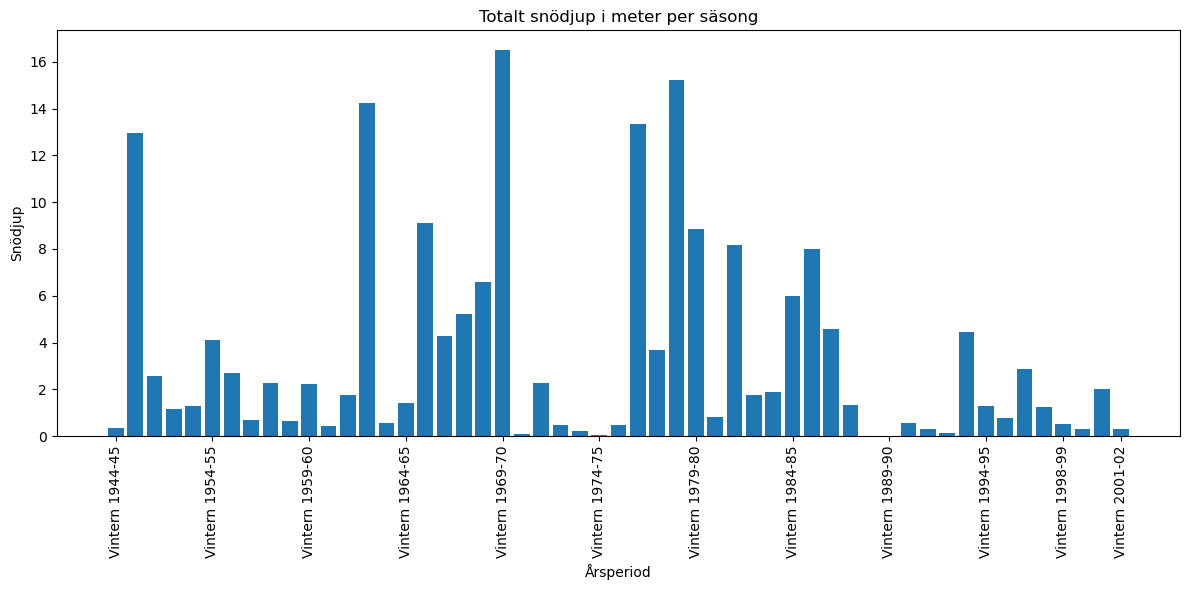

In [43]:
plt.figure(figsize=(12, 6))
plt.bar(df_period['Årsperiod'], df_period['Snödjup'])
plt.xlabel('Årsperiod')
plt.ylabel('Snödjup')
plt.title('Totalt snödjup i meter per säsong')
plt.xticks(rotation=90, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 49, 52],
            labels=['Vintern 1944-45', 'Vintern 1954-55', 'Vintern 1959-60' , 'Vintern 1964-65', 'Vintern 1969-70', 'Vintern 1974-75', 'Vintern 1979-80', 'Vintern 1984-85', 'Vintern 1989-90', 'Vintern 1994-95', 'Vintern 1998-99', 'Vintern 2001-02', ])
plt.tight_layout()
# plt.savefig("../plottar/totalsnödjup.png")


<Axes: xlabel='Vinterjustering', ylabel='Snödjup'>

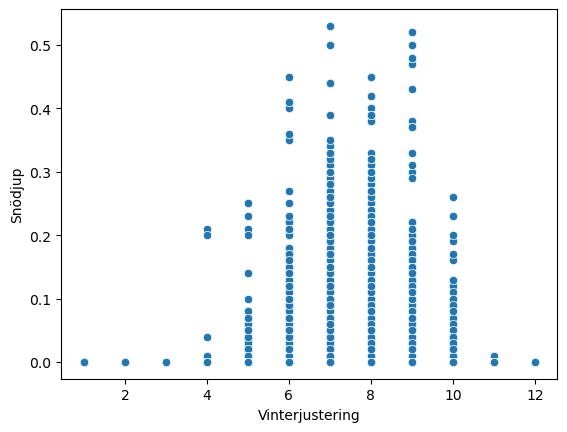

In [29]:
sns.scatterplot(data=snodjup3, x='Vinterjustering', y='Snödjup')

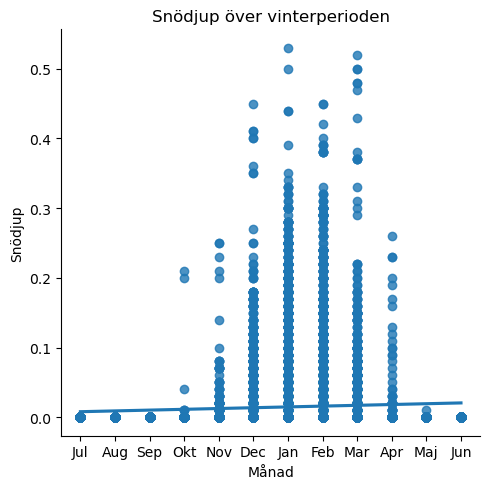

In [49]:
sns.lmplot(data=snodjup3, x='Vinterjustering', y='Snödjup')
plt.title('Snödjup över vinterperioden')
plt.xlabel('Månad')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
           labels=['Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun'])
plt.tight_layout()
# plt.savefig("../plottar/snöperperiod.png")

Snödjup är räknat i antal meter, minimum 0.01 (1 cm)

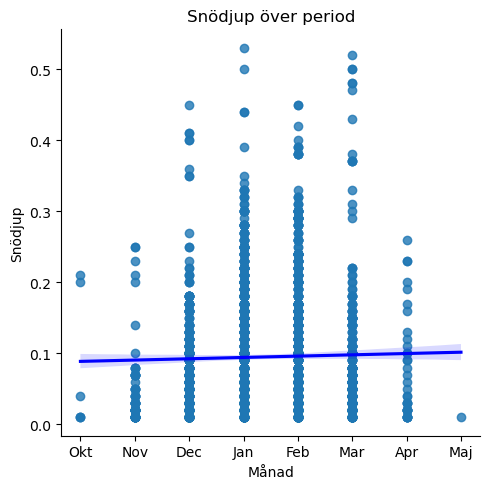

In [45]:
snodjup4 = snodjup3.query("Snödjup >= .01")
sns.lmplot(data = snodjup4, x = 'Vinterjustering', y = 'Snödjup', line_kws={'color' : 'blue'})
plt.title('Snödjup över period')
plt.xlabel('Månad')
plt.xticks(ticks=[4, 5, 6, 7, 8, 9, 10, 11], labels=['Okt', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'Maj'])
plt.tight_layout()

Denna grafen visar egentligen bara att det ligger kvar mer snö i slutet av säsongen än i tidiga säsongen

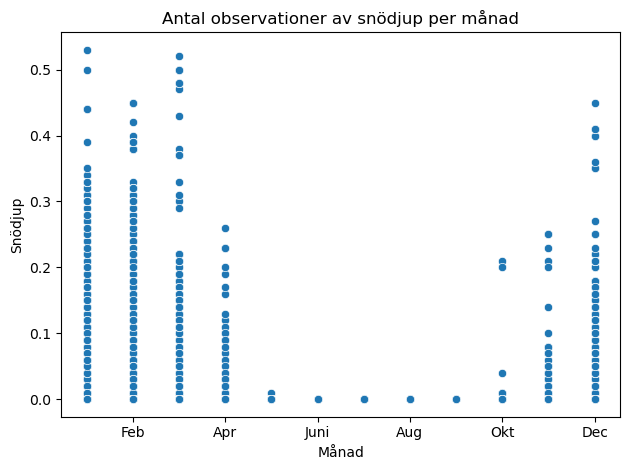

In [31]:
sns.scatterplot(data= snodjup, x='Month', y = 'Snödjup')
plt.title('Antal observationer av snödjup per månad')
plt.xticks(ticks=[2, 4, 6, 8, 10, 12], labels=['Feb', 'Apr', 'Juni', 'Aug', 'Okt', 'Dec'])
plt.xlabel('Månad')
plt.tight_layout()
# plt.savefig("../plottar/snodjuppermånad.png")

In [32]:
print("Snödjup i meter")
print(f"Minsta snödjup: {snodjup['Snödjup'].min()}")
print(f"Medelsnödjup över alla år: {(snodjup['Snödjup'].mean())}")
print(f"Max uppmätta snödjupet: {snodjup['Snödjup'].max()}")

Snödjup i meter
Minsta snödjup: 0.0
Medelsnödjup över alla år: 0.01430784442979565
Max uppmätta snödjupet: 0.53


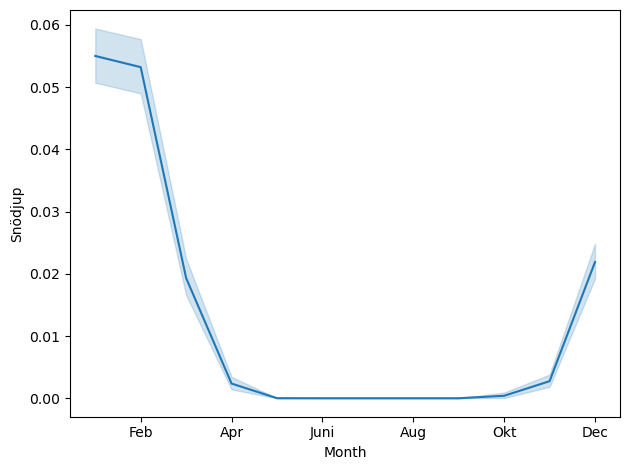

In [33]:
sns.lineplot(data=snodjup, x = 'Month', y = 'Snödjup')
plt.xticks(ticks=[2, 4, 6, 8, 10, 12], labels=['Feb', 'Apr', 'Juni', 'Aug', 'Okt', 'Dec'])
plt.tight_layout()
# plt.savefig("../plottar/snodjuppermånad.png")

Det ser ju ändå rimligt ut att ingen av observationerna skett mellan Juni och September i Göteborg för perioden

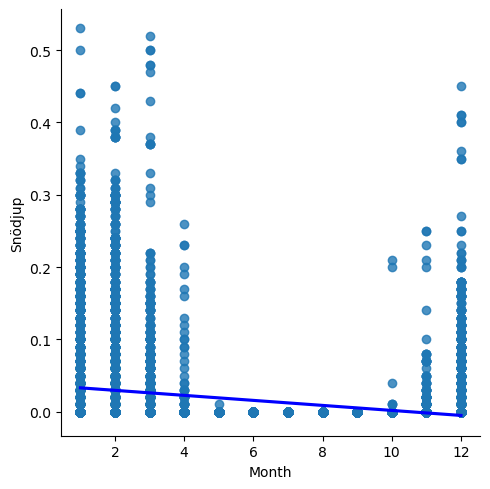

In [34]:
sns.lmplot(data = snodjup, x = 'Month', y = 'Snödjup', line_kws={'color' : 'blue'})

Text(0.5, 1.0, 'Regression över snödjup')

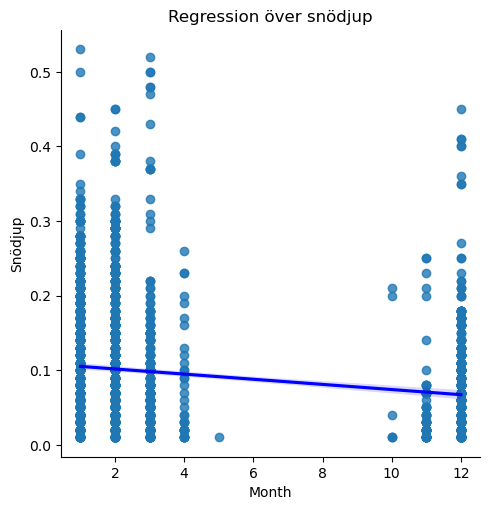

In [35]:
sns.lmplot(data = snodjup2, x = 'Month', y = 'Snödjup', line_kws={'color' : 'blue'})
plt.title('Regression över snödjup')

Det är mindre snö i slutet av året än i början på året vilket inte så konstigt egentligen med tanke på att majoriteten av vintermånaderna är i början på året

In [36]:
sno10 = snodjup3.query("Snödjup >= .1")
sno20 = snodjup3.query("Snödjup >= .2")
sno30 = snodjup3.query("Snödjup >= .3")
sno40 = snodjup3.query("Snödjup >= .4")
sno50 = snodjup3.query("Snödjup >= .5")

In [58]:
print(f"Antal dagar med snödjup över 10 cm: {len(sno10['Datum'].unique())}")
print(f"Antal dagar med snödjup över 20 cm: {len(sno20['Datum'].unique())}")
print(f"Antal dagar med snödjup över 30 cm: {len(sno30['Datum'].unique())}")
print(f"Antal dagar med snödjup över 40 cm: {len(sno40['Datum'].unique())}")
print(f"Antal dagar med snödjup över 50 cm: {len(sno50['Datum'].unique())}")

Antal dagar med snödjup över 10 cm: 853
Antal dagar med snödjup över 20 cm: 289
Antal dagar med snödjup över 30 cm: 75
Antal dagar med snödjup över 40 cm: 20
Antal dagar med snödjup över 50 cm: 5


In [50]:
def count_10_year_intervals(data):
    data = data.drop_duplicates(subset='Datum')
    bins = list(range(1944, 2005, 10))
    interval_counts = data.groupby(pd.cut(data['Year'], bins=bins), observed=True).size()
    return interval_counts

In [61]:
print(count_10_year_intervals(sno10))
# print(count_10_year_intervals(sno20))
# print(count_10_year_intervals(sno30))
# print(count_10_year_intervals(sno40))
# print(count_10_year_intervals(sno50))

KeyError: 0

In [40]:
sno40.Datum

161    1951-01-08
162    1951-01-09
163    1951-01-10
164    1951-01-11
1946   1955-12-17
1947   1955-12-18
1950   1955-12-21
1951   1955-12-22
1952   1955-12-23
6494   1970-02-17
6495   1970-02-18
6496   1970-02-19
6498   1970-02-21
6511   1970-03-06
6512   1970-03-07
6513   1970-03-08
6514   1970-03-09
6515   1970-03-10
6516   1970-03-11
6517   1970-03-12
Name: Datum, dtype: datetime64[ns]

In [41]:
sno40[sno40.Year.apply(lambda x: 1944 <= x <= 1954)].Datum

161   1951-01-08
162   1951-01-09
163   1951-01-10
164   1951-01-11
Name: Datum, dtype: datetime64[ns]

Text(0, 0.5, 'Snödjup i meter')

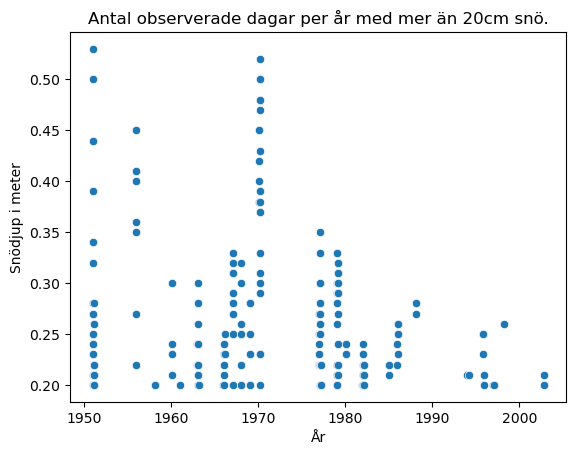

In [42]:
sns.scatterplot(data=sno20, x='Datum', y='Snödjup')
plt.title('Antal observerade dagar per år med mer än 20cm snö.')
plt.xlabel('År')
plt.ylabel('Snödjup i meter')
# plt.savefig("../plottar/dagarmedsnoover20cm.png")